In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
os.chdir('..')
from data.DataObject import DataObject

### Instantiate the DataObject class

In [2]:
do = DataObject()

In [3]:
atomic_data_hdu = do.get_atomic_map_hdu()
atomic_data_wcs = do.get_atomic_map_wcs()

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [4]:
i_component, j_component = do.rsgs_atomic_map_array(atomic_data_hdu)
rsgs_on_atomic_map = atomic_data_hdu.data[i_component, j_component]

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


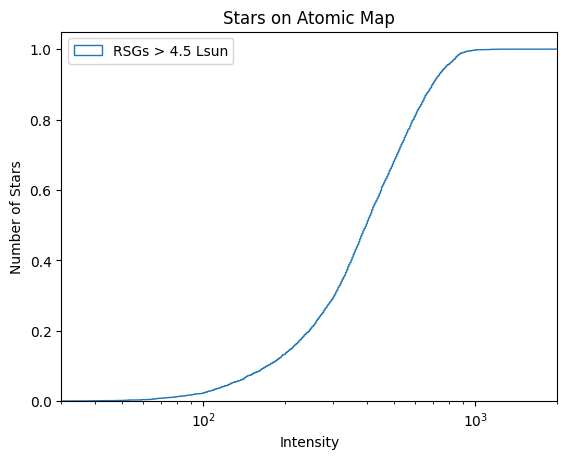

In [5]:
do.plot_rsg_cdf(atomic_data_hdu, rsgs_on_atomic_map, "RSGs on Atomic Map", xlabel="Intensity", ylabel="Number of Stars", gas_label="Atomic Gas")